## 0. Load packages

In [1]:
library("CellEnergy")
library("Seurat")
library("Nebulosa")
library("ggalluvial")

Loading required package: marray

Loading required package: limma

Loading required package: mclust

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: philentropy

Loading required package: plot3D

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: reticulate

Loading required package: Matrix

Loading required package: parallel

Loading required package: plyr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in 

## 1. Load data

In [2]:
setwd("../CellEnergy/")

In [3]:
sc <- Read10X(data.dir = "inst/extdata/input/")

In [4]:
ann <- read.table("inst/extdata/E15.5_ann.txt", header = T)

## 2. Preprocessing of the data with Seurat

In [5]:
sc.ob = CreateSeuratObject(sc)
sc.ob@meta.data <- cbind(sc.ob@meta.data,ann)

In [6]:
sc.ob <- NormalizeData(sc.ob)
sc.ob <- ScaleData(sc.ob,do.center = TRUE, feature <- rownames(sc.ob@assays$RNA@counts))
sc.ob <- FindVariableFeatures(sc.ob, selection.method = "mvp")

Centering and scaling data matrix



In [7]:
sc.ob <- RunPCA(sc.ob,features = head(VariableFeatures(sc.ob), 100))
sc.ob <- RunUMAP(sc.ob,features = head(VariableFeatures(object = sc.ob),100),n.neighbors = 15,n.components = 2L)
sc.ob <- RunTSNE(sc.ob,features = head(VariableFeatures(object = sc.ob),100))

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  Sox4, Neurog3, Sparc, Cd24a, Mdk, Stmn1, H19, Spp1, Btbd17, Clu 
	   Gadd45a, Ppp1r14a, Cdkn1c, Tinagl1, Serpina1c, Cdkn1a, Cxcl12, Dbi, Btg2, Krt19 
	   Id1, Tmsb4x, Mt1, Vim, Mt2, Cyr61, Igfbpl1, Hes1, Hmgb2, Krtap17-1 
Negative:  Pcsk1n, Rbp4, Pcsk2, 1700086L19Rik, Meis2, Dbpht2, Iapp, Mafb, Tmem27, Slc38a5 
	   Isl1, Chga, Tuba1a, Chgb, Gch1, Zcchc18, Scg2, Manf, Cryba2, Ppp1r1a 
	   Gpx3, Lrpprc, Peg10, Sdf2l1, Nnat, Ttr, Ins2, Hspa5, Dlk1, Fev 
PC_ 2 
Positive:  Tinagl1, Cxcl12, Spp1, Dbi, Mt1, Mt2, Cyr61, Hes1, Krt18, Vim 
	   Clu, 8430408G22Rik, Sparc, Ttr, H19, Id2, Cenpf, Hhex, Dlk1, Id1 
	   2810417H13Rik, Hspa5, Cdkn1c, Hmgb2, Ccnb1, Ube2c, Hist1h2bc, Iapp, Sdf2l1, Cdc20 
Negative:  Cck, Igfbpl1, Btbd17, Selm, Btg2, Krt7, 1110012L19Rik, Mfap4, Gadd45a, Ppp1r14a 
	   Tmsb4x, Hspa8, Mdk, Neurog3, Krtap17

In [8]:
saveRDS(sc.ob,file = 'inst/out/Exp_Seurat.rds')

In [9]:
top <- head(VariableFeatures(sc.ob), 100)
in.data <- sc.ob@assays$RNA@scale.data[top,]
head(in.data)
write.csv(in.data,"inst/out/GLNE_100.csv")

,AAACCTGAGAGGGATA-1,AAACCTGAGGCAATTA-1,AAACCTGGTAAGTGGC-1,AAACCTGTCCCTCTTT-1,AAACGGGAGTAGCGGT-1,AAACGGGCAAAGAATC-1,AAACGGGGTACAGTTC-1,AAACGGGGTCGGGTCT-1,AAACGGGGTGAAATCA-1,AAACGGGTCAAACAAG-1,⋯,TTTGGTTAGACAGGCT-1,TTTGGTTCAAATTGCC-1,TTTGGTTCACGAAGCA-1,TTTGGTTTCACTTACT-1,TTTGGTTTCCTTTCGG-1,TTTGTCAAGAATGTGT-1,TTTGTCAAGTGACATA-1,TTTGTCAAGTGTGGCA-1,TTTGTCATCGAATGCT-1,TTTGTCATCTGTTTGT-1
Ins2,-0.7447465,0.1434816,0.04458397,0.0987403,-0.2081320,0.3575822,2.999901951,0.1685861,-0.3844168,-0.7447465,⋯,-0.1615593,3.41693418,-0.7447465,-0.43255306,0.4919694,-0.06974163,-0.4051283,-0.09361667,-0.21568593,-0.7447465
Ghrl,-0.3721781,-0.3721781,-0.37217806,0.3919698,-0.3721781,-0.3721781,-0.372178062,0.2785170,0.1128604,-0.3721781,⋯,-0.3721781,-0.37217806,-0.3721781,0.04806440,-0.3721781,-0.37217806,-0.3721781,-0.37217806,-0.37217806,3.3016347
Sst,-0.2107535,-0.2107535,-0.21075355,-0.2107535,7.4730379,-0.2107535,-0.210753549,-0.2107535,-0.2107535,-0.2107535,⋯,-0.2107535,-0.21075355,-0.2107535,-0.21075355,-0.2107535,-0.21075355,-0.2107535,-0.21075355,-0.21075355,-0.2107535
Gcg,-0.4362106,-0.4362106,-0.43621056,2.4311992,-0.4362106,-0.4362106,-0.075460103,3.1353544,-0.4362106,-0.4362106,⋯,3.2229147,-0.05544227,-0.4362106,-0.43621056,-0.4362106,-0.43621056,-0.4362106,-0.43621056,3.33756723,-0.4362106
Ins1,-0.4383821,-0.4383821,-0.43838209,0.3014473,-0.4383821,-0.4383821,-0.001677715,0.1916050,-0.4383821,0.1644521,⋯,-0.4383821,3.73087391,-0.4383821,-0.03151356,-0.4383821,-0.43838209,-0.4383821,-0.43838209,-0.01494792,-0.4383821
Iapp,-0.8559876,1.0581394,-0.85598758,0.4757250,1.9265620,-0.2575045,2.072051576,1.3508293,-0.3593184,-0.4582776,⋯,-0.3545616,1.82765972,-0.1634585,-0.85598758,0.9129229,-0.85598758,-0.8559876,-0.85598758,1.27703961,0.4199484


## 3. Calculate gene local network energy and cell energy

In [10]:
library(reticulate)
use_python("/data/biosoft/miniconda3/envs/py3.9/bin/python")
result <- calcGEn("inst/out/GLNE_100.csv", verbose = TRUE)
scEn <- result$scEn
GLNE <- result$GLNE
head(scEn)

2023-12-08 17:32:21.307506: Starting calculation.

2023-12-08 17:32:29.633519: Complete GLNE and cell Energy calculation.



,scEnergy,scEn_Nor
,<dbl>,<dbl>
AAACCTGAGAGGGATA-1,-300,0.8849765
AAACCTGAGGCAATTA-1,-666,0.5985915
AAACCTGGTAAGTGGC-1,-435,0.7793427
AAACCTGTCCCTCTTT-1,-820,0.4780908
AAACGGGAGTAGCGGT-1,-861,0.4460094
AAACGGGCAAAGAATC-1,-496,0.7316119


## 4. Data dimensionality reduction and visualization

### 4.1 Data dimensionality reduction

In [11]:
# Gene local network energy matrix as input
En_ob = CreateSeuratObject(GLNE)
En_ob@meta.data <- cbind(En_ob@meta.data,scEn,ann)

In [12]:
En_ob <- NormalizeData(En_ob)
En_ob <- ScaleData(En_ob, feature <- rownames(En_ob@assays$RNA@counts))

Centering and scaling data matrix



In [13]:
En_ob <- RunPCA(En_ob,features = rownames(En_ob@assays$RNA@scale.data))
En_ob <- RunUMAP(En_ob,features = rownames(En_ob@assays$RNA@scale.data), n.neighbors = 15, n.components = 2L)
En_ob <- RunTSNE(En_ob,features = rownames(En_ob@assays$RNA@scale.data))

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  Cd24a, Neurog3, Sox4, Mdk, Sparc, Stmn1, Ppp1r14a, Btbd17, Cdkn1a, H19 
	   Spp1, Tinagl1, Serpina1c, Clu, Cxcl12, Gadd45a, Btg2, Cdkn1c, Krt19, Id1 
	   Vim, Tmsb4x, Cyr61, Dbi, Krtap17-1, Hhex, Igfbpl1, Hes1, Mfap4, 8430408G22Rik 
Negative:  Rbp4, Pcsk1n, Pcsk2, 1700086L19Rik, Tmem27, Dbpht2, Iapp, Isl1, Meis2, Slc38a5 
	   Mafb, Scg2, Zcchc18, Gch1, Chga, Chgb, Ppp1r1a, Tuba1a, Cryba2, Lrpprc 
	   Manf, Peg10, Gpx3, Fev, Sdf2l1, Ttr, Gast, Ppy, Hspa5, Ins2 
PC_ 2 
Positive:  Cxcl12, Tinagl1, Cyr61, Hes1, Spp1, 8430408G22Rik, Vim, Hhex, Mt2, Clu 
	   Krt18, Dbi, Id2, Ttr, Sparc, Mt1, Cenpf, 2810417H13Rik, Id1, H19 
	   Dlk1, Cdkn1c, Ccnb1, Hspa5, Hist1h2bc, Sdf2l1, Ube2c, Mest, Maged2, Iapp 
Negative:  Cck, Igfbpl1, Btbd17, Mfap4, Selm, Btg2, Hspa8, Gadd45a, Krt7, Ppp1r14a 
	   Tmsb4x, 1110012L19Rik, Neurog3, Kr

In [15]:
saveRDS(En_ob,file = 'inst/out/En_Seurat.rds')

### 4.2 Data visualization

In [16]:
En_ob <- readRDS("inst/out/En_Seurat.rds")

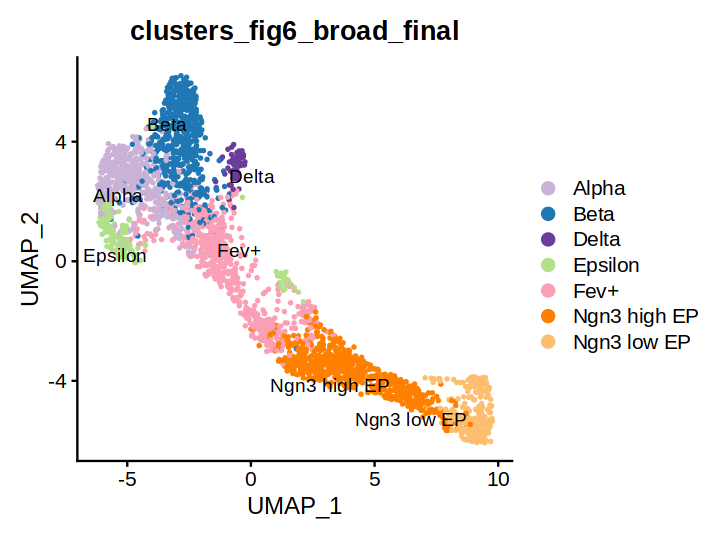

In [18]:
options(repr.plot.width = 6, repr.plot.height = 4.5)
#pdf("inst/out/En_UMAP.pdf",width = 6,height = 4.5)
DimPlot(En_ob,reduction = "umap", label = TRUE,pt.size = 0.5,group.by = "clusters_fig6_broad_final",repel = TRUE,
        cols = c('#cab2d6','#1f78b4','#6a3d9a','#b2df8a','#fa9fb5','#ff7f00','#fdbf6f'))
#dev.off()

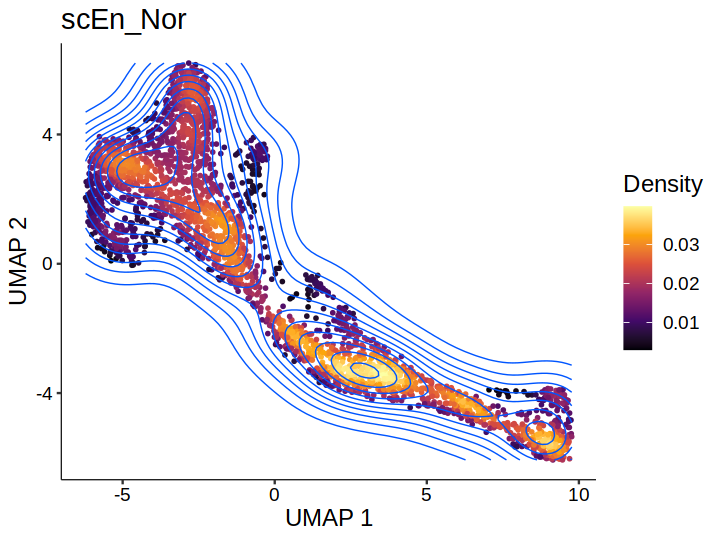

In [20]:
options(repr.plot.width = 6, repr.plot.height = 4.5)
#pdf("inst/out/En_density.pdf",width=6,height=4.5)
plot_density(En_ob, reduction = "umap", features =c("scEn_Nor"), pal = c("inferno"), alpha = 1)+  
  stat_density_2d(mapping=aes(x = UMAP_1,  y= UMAP_2), linemitre = 20, colour = "#0055FF", linetype = 1, linewidth = 0.3)
#dev.off()

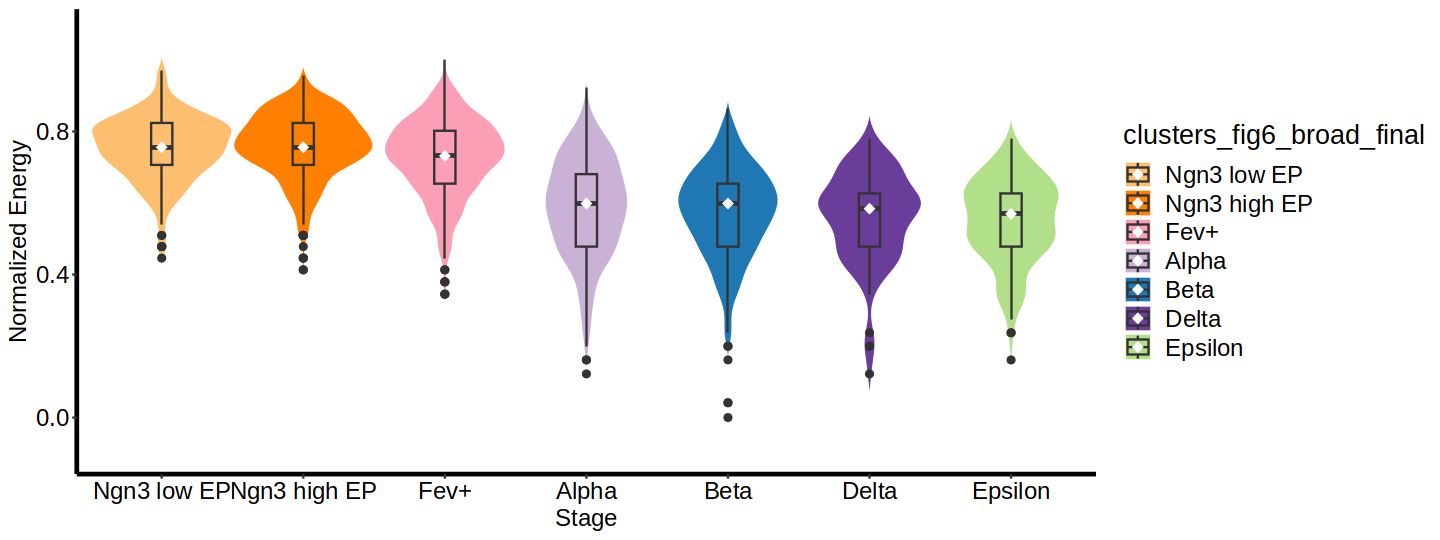

In [22]:
options(repr.plot.width = 12, repr.plot.height = 4.5)
En_re <- En_ob@meta.data

#pdf("inst/out/En_boxplot.pdf",height = 4.5,width = 12)

cols <- c('#fdbf6f','#ff7f00','#fa9fb5','#cab2d6','#1f78b4','#6a3d9a','#b2df8a')
En_re$clusters_fig6_broad_final <- factor(En_re$clusters_fig6_broad_final,
                                          level = c("Ngn3 low EP","Ngn3 high EP","Fev+","Alpha","Beta","Delta","Epsilon"))
P2 <- ggplot(En_re, aes(x = clusters_fig6_broad_final, y = scEn_Nor, fill = clusters_fig6_broad_final)) + 
  geom_violin(trim = F, color = "white", width = 1) + 
  geom_boxplot(width = 0.15, position = position_dodge(0.4)) + 
  scale_fill_manual(values = cols) + 
  stat_summary(fun = "median", geom = "point", shape = 18, size = 3, color = "white", position = position_dodge(0.4)) +
  theme_bw() +
  theme(
    axis.text = element_text(colour = "black", size = 14),
    axis.title = element_text(colour = "black", size = 14), 
    panel.border = element_blank(),
    axis.line = element_line(colour = "black", linewidth = 1), 
    legend.text = element_text(colour = "black", size = 14),
    legend.title = element_text(colour = "black", size = 16),
    panel.grid.major = element_blank(),  
    panel.grid.minor = element_blank()
  ) + 
  xlab("Stage") + ylab("Normalized Energy")

print(P2)

#dev.off()

## 5. Identification of potential states and visualization

### 5.1 Identification of potential states

In [23]:
set.seed(12345)

En_Nor <- scEn$scEn_Nor
names(En_Nor) <- rownames(scEn)

ph <- ann$clusters_fig6_broad_final

path <- "inst/out/"

pot_re <- PotencyFinder(Nor_en = En_Nor, pheno = ph, diffvar = TRUE, maxPS = 9, verbose = T, path = path)  #verbose=T,path=NULL

2023-12-08 17:35:35.212385: Fitting GMM to logit-transformed Energy values.



[1] "2023-12-08 17:35:36.021028: Plots generated."
[1] "2023-12-08 17:35:36.027241: Model Output."
[1] "2023-12-08 17:35:36.027453: Identified 3 potency states."


2023-12-08 17:35:36.037668: Calculate the Heterogeneous index for each phenotype category.

2023-12-08 17:35:36.040529: Complete.



### 5.2 Potential states visualization

In [24]:
En_ob <- readRDS("inst/out/En_Seurat.rds")

In [25]:
potS <- pot_re$potS
UMAP <- En_ob@reductions$umap@cell.embeddings
head(UMAP)

,UMAP_1,UMAP_2
AAACCTGAGAGGGATA-1,-1.3405651,1.007293
AAACCTGAGGCAATTA-1,-3.1641352,1.154850
AAACCTGGTAAGTGGC-1,1.4880078,-2.777701
AAACCTGTCCCTCTTT-1,-4.9553725,2.046264
AAACGGGAGTAGCGGT-1,-0.9288935,3.747160
AAACGGGCAAAGAATC-1,-2.7288719,3.023842


In [26]:
data <- list(potencyState = potS, coordinates = UMAP)

In [27]:
path <- "inst/out/"
PotencyVisualizer(data, plotPath = path)  #plotPath=NULL

2023-12-08 17:36:27.570587: Plotting completed.



## 6. Cell fate mapping

### 6.1 Identify terminal state cells

In [28]:
meta <- cbind(En_ob@meta.data,UMAP)
En <- meta$scEn_Nor
names(En) <- rownames(meta)
terC <- find_terminal_states(En, theta = 0.85, decreasing = TRUE, diffvar = FALSE, maxPS = 3)

2023-12-08 17:36:56.169391: Identification of terminal states.



[1] "2023-12-08 17:36:56.187678: Identified 2 potency states."


2023-12-08 17:36:56.190721: Done.



### 6.2 Cell similarity index (CSI) calculation

In [29]:
meta <- meta %>%
  mutate(
    Class = if_else(rownames(meta) %in% terC$terminal_cells, clusters_fig6_broad_final, "Other"),
    Category = if_else(Class == "Other", "Other", "Terminal")
  )

In [30]:
ter_Class <- meta$Class
names(ter_Class) <- rownames(meta)
ter_Class[1:5]

AAACCTGAGAGGGATA-1 AAACCTGAGGCAATTA-1 AAACCTGGTAAGTGGC-1 AAACCTGTCCCTCTTT-1 
           "Other"            "Other"            "Other"            "Other" 
AAACGGGAGTAGCGGT-1 
           "Other"

In [31]:
CSI <- calcCSI(ter_Class, GLNE, normalize = TRUE)

2023-12-08 17:37:32.003453: Starting CSI calculation.

2023-12-08 17:37:32.508621: Calculation completed.



### 6.3 Terminal state cell visualization

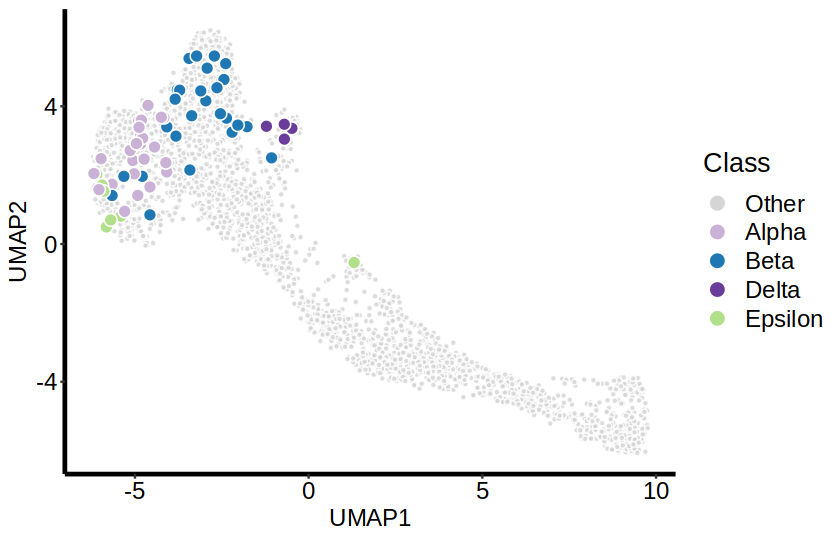

In [33]:
meta0 <- meta[!(meta$Class %in% "Other"),]
meta$Class <- factor(meta$Class,level = c("Other","Alpha","Beta","Delta","Epsilon"))

options(repr.plot.width = 7, repr.plot.height = 4.5)

#pdf("inst/out/Terminal_UMAP.pdf",height = 5,width = 7)

P2 <- ggplot() + 
  geom_point(meta, mapping = aes(x = UMAP_1, y = UMAP_2, fill = Class, alpha = Class, size = Class), shape = 21, color = "white") +
  scale_fill_manual(values = c("lightgrey", '#cab2d6', '#1f78b4', '#6a3d9a', '#b2df8a')) +
  scale_alpha_manual(values = c(0.8, 1, 1, 1, 1, 1, 1, 1)) +
  scale_size_manual(values = c(1, 3, 3, 3, 3, 3, 3, 3)) +
  theme_bw() +
  theme(
    axis.text = element_text(colour = "black", size = 14),
    axis.title = element_text(colour = "black", size = 14),
    panel.border = element_blank(),
    axis.line = element_line(colour = "black", linewidth = 1),
    legend.text = element_text(colour = "black", size = 14),
    legend.title = element_text(colour = "black", size = 16),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) + 
  xlab("UMAP1") + ylab("UMAP2") +
  guides(color = guide_legend(reverse = TRUE)) +
  guides(fill = guide_legend(override.aes = list(size = 4)))

P2 + geom_point(meta0, mapping = aes(x = UMAP_1, y = UMAP_2, fill = Class, alpha = Class, size = Class), shape = 21, color = "white")

#dev.off()

### 6.4 The proportion of terminal state cells

In [34]:
proT <- c(table(meta$Class))
numT <- proT[names(proT) != "Other"]
perT <- numT/sum(numT)*100 
df <- data.frame(numT,perT)
df$names <- rownames(df)
df

,numT,perT,names
,<int>,<dbl>,<chr>
Alpha,26,41.269841,Alpha
Beta,26,41.269841,Beta
Delta,4,6.349206,Delta
Epsilon,7,11.111111,Epsilon


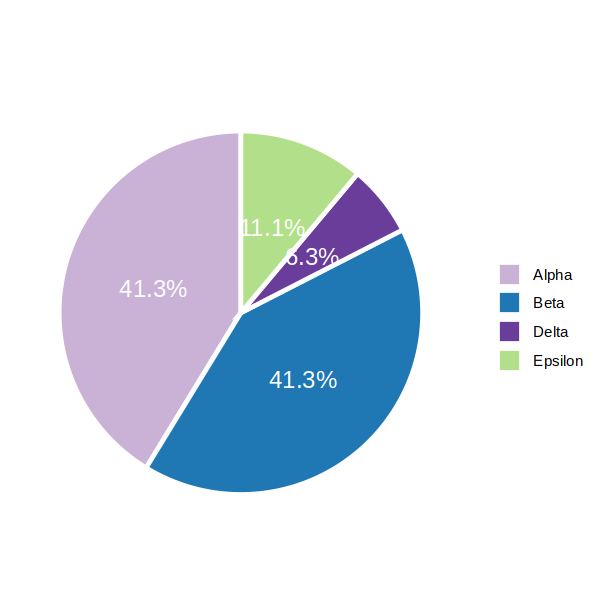

In [36]:
options(repr.plot.width = 5, repr.plot.height = 5)

#pdf("inst/out/Terminal_Pie.pdf",height =5,width = 5)

colors <- c('#cab2d6','#1f78b4','#6a3d9a','#b2df8a')

ggplot(df,aes('', y = numT, fill = names))+
  geom_bar(width=1,size=1,color="white",stat="identity") +
  coord_polar(theta = "y")+
  geom_text(aes(label=paste0(round(perT,1),"%")),color="white",
            position=position_stack(vjust=.5),size=5) +
  labs(x = NULL, y = NULL, fill = NULL,
       title = '') +
  scale_fill_manual(values = colors) +
  theme_classic() +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(hjust=0.5,color = "#666666"))

#dev.off()

### 6.5 Category of terminal state cells

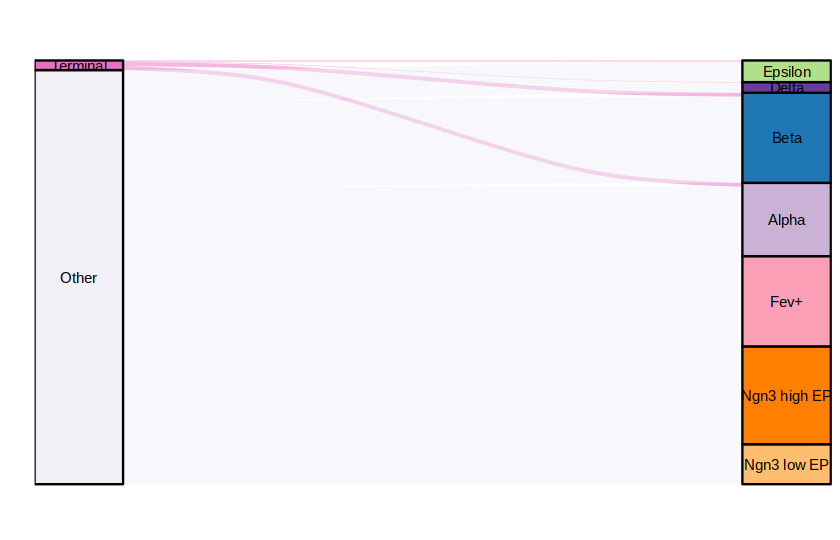

In [38]:
df1 = meta[,c("Category","clusters_fig6_broad_final")]

UCB_lodes <- to_lodes_form(df1[,1:ncol(df1)],
                           axes = 1:ncol(df1))

UCB_lodes$stratum = factor(UCB_lodes$stratum,
                           levels = c("Terminal","Other","Epsilon","Delta","Beta","Alpha","Fev+","Ngn3 high EP","Ngn3 low EP"))

mycol <- c('#ea6fc0','#f1f0f7',  # Category
          '#b2df8a','#6a3d9a','#1f78b4','#cab2d6','#fa9fb5','#ff7f00','#fdbf6f')   # clusters_fig6_broad_final


options(repr.plot.width = 7, repr.plot.height = 4.5)

#pdf("inst/out/Sankey.pdf",width = 5.5,height = 5)

ggplot(UCB_lodes,
       aes(x = x, stratum = stratum, alluvium = alluvium,
           fill = stratum, label = stratum)) +
  scale_x_discrete(expand = c(0, 0)) + 
  geom_flow(width = 1/8) + 
  geom_stratum(alpha = 1, width = 1/8) + 
  geom_text(stat = "stratum", size = 3, color = "black") + 
  scale_fill_manual(values = mycol) +
  xlab("") + ylab("") +
  theme_bw() + 
  theme(
    panel.grid = element_blank(),
    panel.border = element_blank(),
    axis.line = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank()
  ) + 
  ggtitle("") +
  guides(fill = FALSE)

#dev.off()

### 6.6 Mapping of cell fate transition

In [39]:
head(CSI) 
head(meta)

,Alpha,Beta,Delta,Epsilon
AAACCTGAGAGGGATA-1,0.192070739,0.6601698,0.14775949,0.00000000
AAACCTGAGGCAATTA-1,0.614698274,0.3016306,0.08367108,0.00000000
AAACCTGGTAAGTGGC-1,0.541307965,0.3120310,0.14666106,0.00000000
AAACCTGTCCCTCTTT-1,0.683522780,0.3000784,0.00000000,0.01639886
AAACGGGAGTAGCGGT-1,0.002277322,0.1476118,0.85011083,0.00000000
AAACGGGCAAAGAATC-1,0.412920875,0.5385185,0.00000000,0.04856059


,orig.ident,nCount_RNA,nFeature_RNA,scEn_Nor,scEnergy,index,day,clusters_fig3_final,clusters_fig3_final_noep,clusters_fig4_final,clusters_fig2_final,clusters_fig6_broad_final,clusters_fig6_fine_final,clusters_fig6_alpha_final,UMAP_1,UMAP_2,Class,Category
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
AAACCTGAGAGGGATA-1,SeuratProject,-300,0,0.8849765,-300,AAACCTGAGAGGGATA-1,3,Fev+,Fev+,Fev+,Fev+,Fev+,Fev+ Beta,9,-1.3405651,1.007293,Other,Other
AAACCTGAGGCAATTA-1,SeuratProject,-666,0,0.5985915,-666,AAACCTGAGGCAATTA-1,3,Endocrine,Endocrine,Excluded,Endocrine,Alpha,Alpha,13,-3.1641352,1.154850,Other,Other
AAACCTGGTAAGTGGC-1,SeuratProject,-435,0,0.7793427,-435,AAACCTGGTAAGTGGC-1,3,Ngn3 high EP,Ngn3 high EP,Ngn3 high EP,EP,Ngn3 high EP,Ngn3 High late,8,1.4880078,-2.777701,Other,Other
AAACCTGTCCCTCTTT-1,SeuratProject,-820,0,0.4780908,-820,AAACCTGTCCCTCTTT-1,3,Endocrine,Endocrine,Excluded,Endocrine,Alpha,Alpha,13,-4.9553725,2.046264,Other,Other
AAACGGGAGTAGCGGT-1,SeuratProject,-861,0,0.4460094,-861,AAACGGGAGTAGCGGT-1,3,Endocrine,Endocrine,Excluded,Endocrine,Delta,Delta,17,-0.9288935,3.747160,Other,Other
AAACGGGCAAAGAATC-1,SeuratProject,-496,0,0.7316119,-496,AAACGGGCAAAGAATC-1,3,Endocrine,Endocrine,Excluded,Endocrine,Beta,Beta,10,-2.7288719,3.023842,Other,Other


In [40]:
path <- findPath(CSI, meta, decreasing = TRUE)

2023-12-08 17:39:04.936079: Starting fate assignment.

2023-12-08 17:39:04.979609: Done.



### 6.7 Marker gene visualization

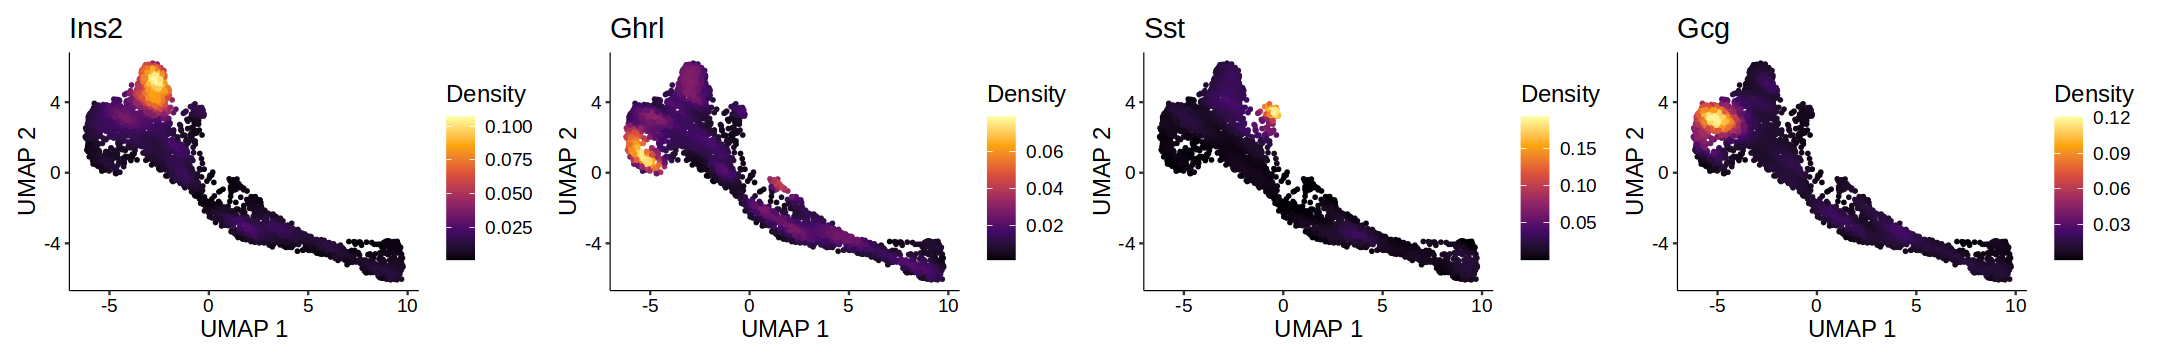

In [42]:
options(repr.plot.width = 18, repr.plot.height = 3)
#pdf("inst/out/En_HVGs.pdf",width = 12,height = 2)
p2 <- plot_density(En_ob, reduction = "umap",rownames(En_ob@assays$RNA@scale.data)[1:4], pal = "inferno")
p2 + plot_layout(ncol = 4)
#dev.off()

In [43]:
GLNE_Nor <- En_ob@assays$RNA@scale.data
tGLNE <- as.data.frame(t(GLNE_Nor))
tGLNE$ID <- rownames(tGLNE)
tGLNE[1:3,1:4]

re1 <- merge(path, tGLNE, by.x = "index", by.y = "ID")
head(re1)

,Ins2,Ghrl,Sst,Gcg
,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGAGAGGGATA-1,-0.6201866,-0.5620314,-0.2729898,-0.574207
AAACCTGAGGCAATTA-1,1.6034199,-0.5620314,-0.2729898,-0.574207
AAACCTGGTAAGTGGC-1,1.6863710,-0.5620314,-0.2729898,-0.574207


,index,orig.ident,nCount_RNA,nFeature_RNA,scEn_Nor,scEnergy,day,clusters_fig3_final,clusters_fig3_final_noep,clusters_fig4_final,⋯,Dbpht2,Ccnb1,Scg2,Arx,Mfap4,Tm4sf4,Gadd45g,Hspa5,1110012L19Rik,Hist1h2bc
,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AAACCTGAGAGGGATA-1,SeuratProject,-300,0,0.8849765,-300,3,Fev+,Fev+,Fev+,⋯,-0.9237517,-0.2752686,-0.7241565,-0.6463639,-0.6201155,1.1129907,-0.8855354,-1.023895,-0.9706594,-0.9398093
2,AAACCTGAGGCAATTA-1,SeuratProject,-666,0,0.5985915,-666,3,Endocrine,Endocrine,Excluded,⋯,1.0755703,-0.2752686,-0.7241565,1.5355087,-0.6201155,0.9755049,-0.8855354,0.964311,-0.9706594,-0.9398093
3,AAACCTGGTAAGTGGC-1,SeuratProject,-435,0,0.7793427,-435,3,Ngn3 high EP,Ngn3 high EP,Ngn3 high EP,⋯,-0.9237517,-0.2752686,-0.7241565,-0.6463639,1.6533003,1.0490318,-0.8855354,-1.023895,1.0630352,1.1229768
4,AAACCTGTCCCTCTTT-1,SeuratProject,-820,0,0.4780908,-820,3,Endocrine,Endocrine,Excluded,⋯,1.0390831,-0.2752686,1.3491692,1.4956900,-0.6201155,0.9395350,-0.8855354,-1.023895,-0.9706594,-0.9398093
5,AAACGGGAGTAGCGGT-1,SeuratProject,-861,0,0.4460094,-861,3,Endocrine,Endocrine,Excluded,⋯,-0.9237517,-0.2752686,1.3401242,-0.6463639,1.5221570,-0.9954736,1.0552198,-1.023895,0.9457204,1.0039838
6,AAACGGGCAAAGAATC-1,SeuratProject,-496,0,0.7316119,-496,3,Endocrine,Endocrine,Excluded,⋯,1.1271968,-0.2752686,1.4422430,-0.6463639,-0.6201155,1.0263996,1.1512280,-1.023895,-0.9706594,-0.9398093


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


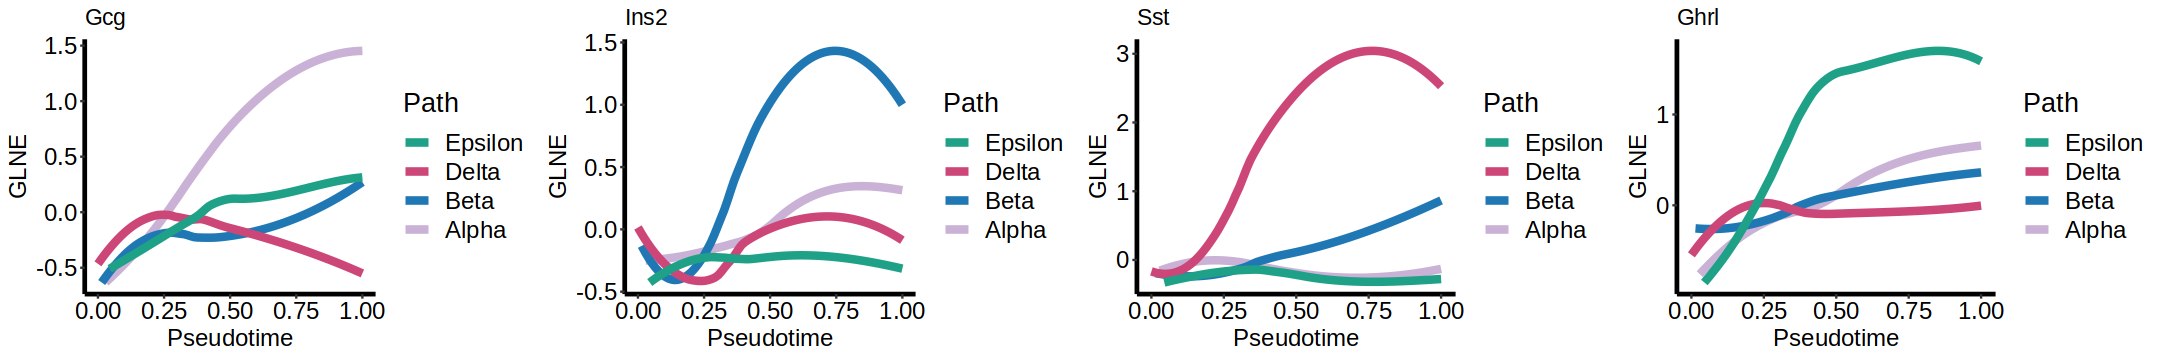

In [45]:
re1$Path <- factor(re1$Path,level=c("Alpha","Beta","Delta","Epsilon"))

options(repr.plot.width = 18, repr.plot.height = 3)

#pdf("inst/out/Dynamics_HVGs.pdf",width = 18, height = 3)

genes <- c("Gcg", "Ins2", "Sst", "Ghrl")
colors <- c('#cab2d6', '#1f78b4', '#CC4678FF', '#1FA187FF')
plot_list <- lapply(genes, function(gene) {
  ggplot(re1, aes(x = Pseudotime, y = get(gene), group = Path, colour = Path)) +
    geom_smooth(method = "loess", se = FALSE, size = 1.8, span = 0.95) +
    scale_colour_manual(values = colors) +
    scale_alpha_manual(values = rep(1, 9)) +
    scale_size_manual(values = rep(1.5, 9)) +
    theme_bw() +
    theme(
      axis.text = element_text(colour = "black", size = 14),
      axis.title = element_text(colour = "black", size = 14),
      panel.border = element_blank(),
      axis.line = element_line(colour = "black", linewidth = 1),
      legend.text = element_text(colour = "black", size = 14),
      legend.title = element_text(colour = "black", size = 16),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank()
    ) +
    xlab("Pseudotime") +
    ylab("GLNE") +
    labs(title = gene) +
    guides(color = guide_legend(reverse = TRUE)) +
    guides(fill = guide_legend(override.aes = list(size = 4)))
})


gridExtra::grid.arrange(grobs = plot_list, ncol = 4)

#dev.off()